# Day 30 Assignment

# Logestic Regression

__Question 1:__
    
Use Digit dataset and perform the Logistic Regression. Import the dataset from Sklearn

In [1]:
#import all necessaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the dataset from sklearn
from sklearn.datasets import load_digits


digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [4]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
#create a dataframe 
data = pd.DataFrame(digits.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
data.columns = digits.feature_names
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
data.shape

(1797, 64)

In [8]:
data.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1797.0,12.089037,4.374694,0.0,11.0,13.0,16.0,16.0
pixel_7_4,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [12]:
#training tha data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, test_size=0.25, random_state=0)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Sidhartha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#predictions
y_pred = log_reg.predict(X_test)
y_pred

array([2, 0, 4, 9, 4, 1, 2, 4, 6, 9, 9, 1, 1, 0, 9, 8, 2, 9, 7, 7, 0, 2,
       6, 7, 2, 1, 5, 7, 2, 4, 3, 4, 3, 6, 1, 2, 4, 8, 8, 6, 2, 8, 1, 8,
       7, 6, 3, 9, 1, 0, 3, 6, 8, 0, 4, 5, 0, 2, 1, 5, 7, 8, 7, 3, 1, 2,
       9, 3, 8, 7, 3, 7, 6, 6, 3, 7, 3, 7, 0, 9, 6, 7, 1, 6, 6, 8, 2, 7,
       4, 3, 3, 6, 3, 9, 3, 4, 9, 6, 6, 4, 4, 0, 1, 2, 9, 9, 8, 3, 6, 8,
       1, 5, 4, 9, 2, 0, 7, 9, 0, 7, 1, 9, 8, 2, 8, 5, 7, 4, 8, 0, 0, 5,
       0, 5, 3, 7, 6, 4, 7, 6, 2, 0, 7, 9, 3, 1, 4, 6, 8, 8, 1, 6, 3, 2,
       3, 4, 0, 4, 9, 6, 0, 2, 7, 2, 0, 1, 4, 4, 1, 0, 1, 4, 1, 0, 7, 2,
       1, 2, 5, 7, 6, 3, 2, 3, 8, 6, 9, 4, 3, 5, 6, 5, 1, 3, 4, 1, 1, 6,
       3, 7, 8, 5, 5, 3, 8, 5, 3, 1, 2, 6, 5, 0, 7, 3, 5, 0, 9, 1, 6, 5,
       4, 4, 9, 9, 4, 4, 7, 4, 1, 3, 1, 5, 1, 0, 9, 6, 5, 9, 0, 4, 5, 0,
       1, 7, 5, 0, 0, 1, 4, 5, 8, 1, 9, 6, 1, 2, 2, 8, 5, 3, 3, 9, 3, 7,
       7, 3, 5, 0, 2, 4, 2, 9, 1, 6, 7, 1, 2, 7, 2, 9, 7, 5, 4, 1, 2, 2,
       3, 3, 6, 0, 9, 9, 8, 2, 7, 1, 5, 6, 1, 3, 2,

In [20]:
#actual and predicted

data_predicted = pd.DataFrame()
data_predicted['Actual'] = y_test
data_predicted['Predicted'] = y_pred
data_predicted.head(10)

,Actual,Predicted
0,2,2
1,0,0
2,4,4
3,9,9
4,4,4
5,1,1
6,2,2
7,4,4
8,6,6
9,7,9


In [21]:
mislabel = np.sum(y_test!=y_pred)
print("total number of mislabelled data points from  {} test samples is {}".format(len(y_test),mislabel))

total number of mislabelled data points from  450 test samples is 19


In [22]:
#aaccuracy_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy score of test set =",accuracy)

Accuracy score of test set = 95.77777777777777


In [23]:
#confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cmdf = pd.DataFrame(cm,index=digits.target_names,columns=digits.target_names)
cmdf

,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,1,0
2,0,1,43,0,0,0,0,0,0,0
3,0,0,0,46,0,0,0,0,0,0
4,0,1,0,0,43,0,0,0,1,0
5,0,1,0,1,0,43,0,1,0,0
6,0,1,0,0,0,0,44,0,0,0
7,0,0,0,1,0,0,0,42,0,2
8,0,4,0,0,0,0,1,0,37,1
9,0,0,0,1,0,1,0,0,0,43


In [24]:
#precision_score
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred,average='weighted')
print('Precision_score of test set =',precision)

Precision_score of test set = 0.960018667235083


In [25]:
#recall_score
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred,average='weighted')
print('recall_score of test set =',recall)

recall_score of test set = 0.9577777777777777


In [26]:
#f1_score
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred,average='weighted')
print('f1_score of test set =',f1)

f1_score of test set = 0.9579545053920543


In [27]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print("Classification reort :",report)

Classification reort :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.85      0.98      0.91        46
           2       1.00      0.98      0.99        44
           3       0.94      1.00      0.97        46
           4       1.00      0.96      0.98        45
           5       0.98      0.93      0.96        46
           6       0.98      0.98      0.98        45
           7       0.98      0.93      0.95        45
           8       0.95      0.86      0.90        43
           9       0.93      0.96      0.95        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



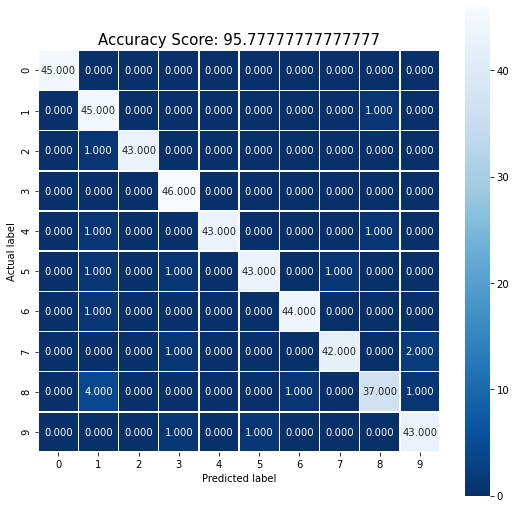

In [28]:
#As you can see below, this method produces a more understandable and visually readable confusion matrix using seaborn.

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
